In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Reading all csv files


### 1. Getting started and knowing our dataset:

#### (i) printing the head and tail of dataset to know basic structure

In [3]:
df1=pd.read_csv("country_wise_latest.csv")
print(df1.head(10).to_string(),"\n\n\n")
print(df1.head(10).to_string())

        Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  Deaths / 100 Recovered  Confirmed last week  1 week change  1 week % increase             WHO Region
0          Afghanistan      36263    1269      25198    9796        106          10             18                3.50                  69.49                    5.04                35526            737               2.07  Eastern Mediterranean
1              Albania       4880     144       2745    1991        117           6             63                2.95                  56.25                    5.25                 4171            709              17.00                 Europe
2              Algeria      27973    1163      18837    7973        616           8            749                4.16                  67.34                    6.17                23691           4282              18.07                 Africa
3              Andorra  

#### (ii) printing all the columns:

In [4]:
print(df1.columns)

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')


#### (iii) getting info: (datatypes of each column)

In [5]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

#### (iv) describing the dataframe:

In [6]:
print(df1.describe().to_string())

          Confirmed         Deaths     Recovered        Active     New cases   New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  Deaths / 100 Recovered  Confirmed last week  1 week change  1 week % increase
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   187.000000     187.000000          187.000000             187.000000                  187.00         1.870000e+02     187.000000         187.000000
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219    28.957219     933.812834            3.019519              64.820535                     inf         7.868248e+04    9448.459893          13.606203
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   120.037173    4197.719635            3.454302              26.287694                     NaN         3.382737e+05   47491.127684          24.509838
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000     0.000000   

/Users/kunaljoshi/Desktop/jupyter/venv/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


#### (v) finding if there any null values in dataset:

In [7]:
print(df1.isnull().sum())

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


### (vi) Removing duplicates if there any :

In [8]:
df1.duplicated()
df1.drop_duplicates(inplace=True)

# Analysis:

### 1. Total Cases, Recovered, Deaths:

Total number of cases worldwide : 16480485
Total number of deaths worldwide : 654036
Total number of recovered worldwide : 9468087


Text(0, 0.5, 'Cases (in tens of million)')

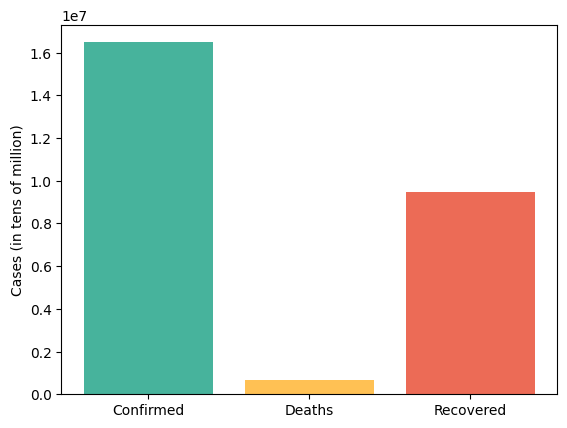

In [9]:
total_cases_worldwide=df1["Confirmed"].sum()
print("Total number of cases worldwide :",total_cases_worldwide)
total_deaths_worldwide=df1["Deaths"].sum()
print("Total number of deaths worldwide :",total_deaths_worldwide)
total_recovered_worldwide=df1["Recovered"].sum()
print("Total number of recovered worldwide :",total_recovered_worldwide)


pie_total=[total_cases_worldwide,total_deaths_worldwide,total_recovered_worldwide]

labell=["Confirmed", "Deaths","Recovered"]

plt.bar(labell,pie_total,color=["#47B39C","#FFC154","#EC6B56"])
plt.ylabel("Cases (in tens of million)")

### 2. Top 10 countries by confirmed cases:

Country/Region
US                4290259
Brazil            2442375
India             1480073
Russia             816680
South Africa       452529
Mexico             395489
Peru               389717
Chile              347923
United Kingdom     301708
Iran               293606


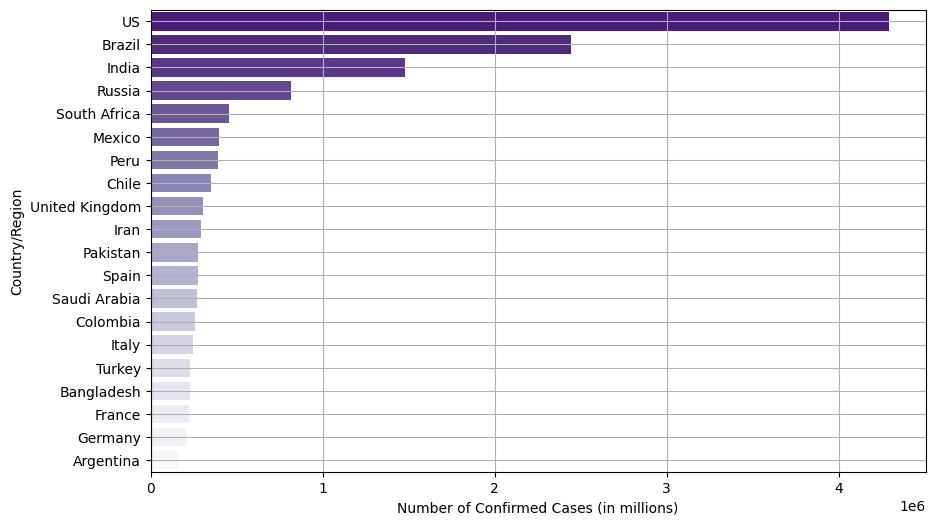

In [10]:
df_confirmed_cases=df1.groupby("Country/Region")["Confirmed"].sum().sort_values(ascending=False)
print(df_confirmed_cases.head(10).to_string())

plt.figure(figsize=(10,6))

top_10_df = df_confirmed_cases.head(20).reset_index()


sns.barplot(x='Confirmed', y='Country/Region', data=top_10_df, palette="Purples_r", hue="Country/Region", dodge=False)

plt.xlabel("Number of Confirmed Cases (in millions)")
plt.grid()

### 3. Top 10 Countries by Death Rate:

Country/Region
Yemen             28.56
United Kingdom    15.19
Belgium           14.79
Italy             14.26
France            13.71
Hungary           13.40
Netherlands       11.53
Mexico            11.13
Spain             10.44
Western Sahara    10.00
Name: Deaths / 100 Cases, dtype: float64


Text(0, 0.5, 'Deaths per 100 Confirmed Cases')

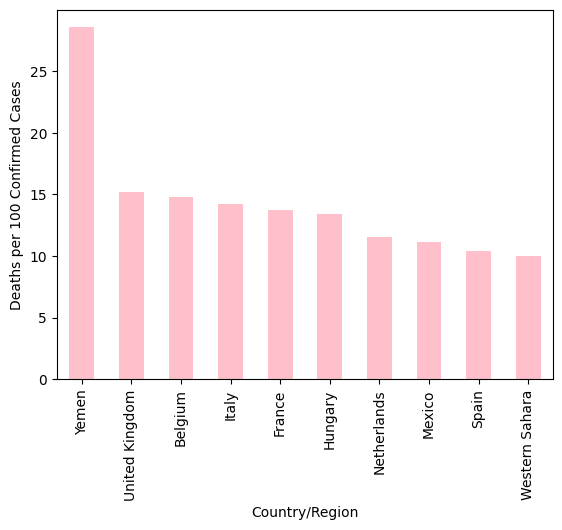

In [11]:
top_death_rate=df1.groupby("Country/Region")["Deaths / 100 Cases"].sum().sort_values(ascending=False).head(10)
print(top_death_rate)

top_death_rate.plot(kind="bar",color="pink")
plt.ylabel("Deaths per 100 Confirmed Cases")

### 4. Top 10 countries by Recovery Rate:

Country/Region
Holy See       100.00
Grenada        100.00
Dominica       100.00
Djibouti        98.38
Iceland         98.33
Brunei          97.87
New Zealand     97.24
Qatar           97.02
Malaysia        96.60
Mauritius       96.51
Name: Recovered / 100 Cases, dtype: float64


Text(0, 0.5, 'Recovery per 100 Confirmed Cases')

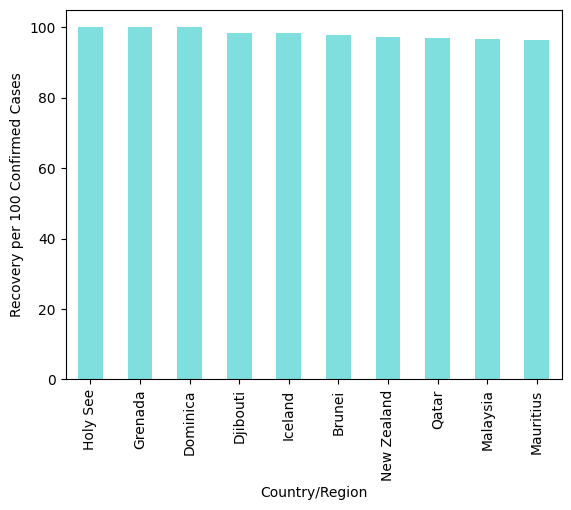

In [12]:
top_recovery_rate=df1.groupby("Country/Region")["Recovered / 100 Cases"].sum().sort_values(ascending=False).head(10)
print(top_recovery_rate)

top_recovery_rate.plot(kind="bar",color="c", alpha=0.5)
plt.ylabel("Recovery per 100 Confirmed Cases")

### 5. New Cases vs New Deaths:

Text(0, 0.5, 'Number Of Cases')

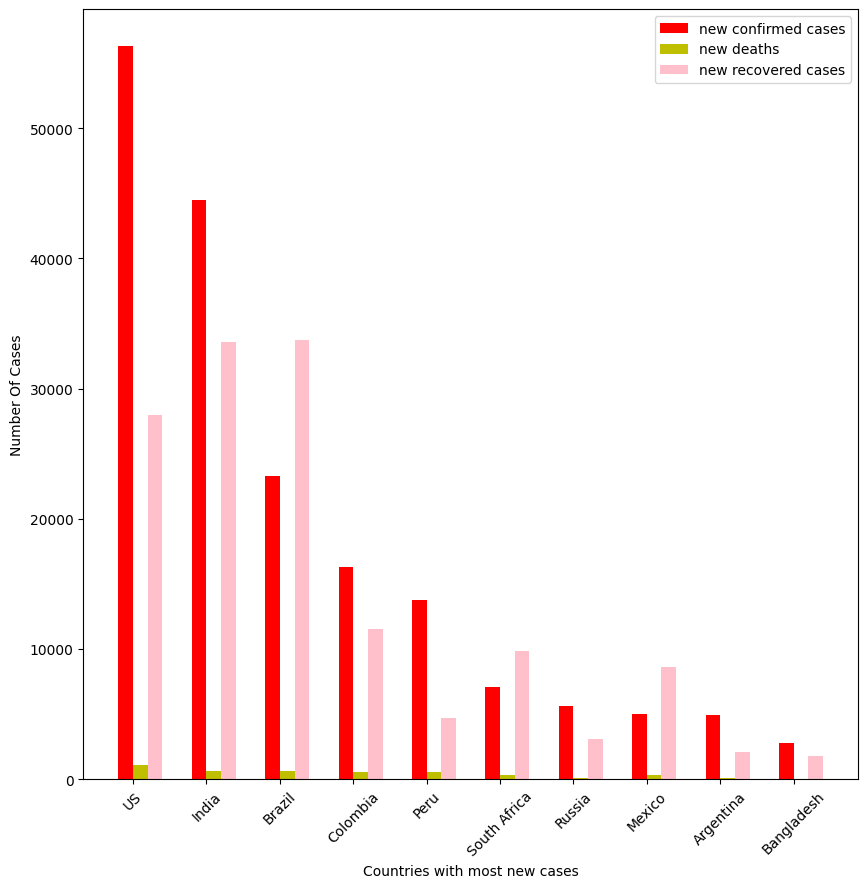

In [13]:
df_top_newcases=df1.sort_values(by="New cases",ascending=False).head(10)
df_new_cases=df_top_newcases["New cases"].head(10)
df_new_deaths=df_top_newcases["New deaths"].head(10)
df_new_recovered=df_top_newcases["New recovered"].head(10)
df_new_countries=df_top_newcases["Country/Region"].head(10)

width=0.3
p=np.arange(len(df_new_countries))*1.5
p1=[i+width for i in p]
p2=[i+2*width for i in p]

plt.figure(figsize=(10,10))
plt.bar(p,df_new_cases,width,color="r", label="new confirmed cases") 
plt.bar(p1,df_new_deaths,width,color="y", label="new deaths") 
plt.bar(p2,df_new_recovered,width,color="pink", label="new recovered cases") 
plt.xticks(p+width/2, df_new_countries, rotation=45 )
plt.legend()
plt.xlabel("Countries with most new cases")
plt.ylabel("Number Of Cases")

### 6. Countrie with highest 1week % increase:

       Country/Region  1 week % increase
130  Papua New Guinea             226.32
63             Gambia             191.07
11            Bahamas             119.54
186          Zimbabwe              57.85
99              Libya              42.78
58           Ethiopia              42.52
22           Botswana              41.57
97            Lesotho              40.67
160          Suriname              37.44
41         Costa Rica              37.34


Text(0, 0.5, '1 week % increase')

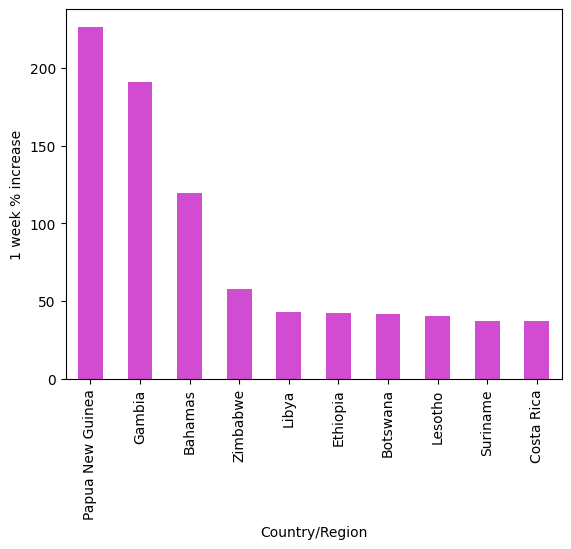

In [27]:
df_1week_highest=df1[["Country/Region", "1 week % increase"]].sort_values(by="1 week % increase",ascending=False).head(10)
print(df_1week_highest)
df_1week_highest.set_index("Country/Region", inplace=True)


df_1week_highest.plot(kind= "bar", legend=False, color="m", alpha=0.7)
plt.ylabel("1 week % increase")

### 7. WHO region wise Total Cases:

                       Confirmed  Deaths  Recovered   Active  New cases  New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  Deaths / 100 Recovered  Confirmed last week  1 week change  1 week % increase
WHO Region                                                                                                                                                                                                                  
Africa                    723207   12223     440645   270339      12176         353          14563              110.71                2736.71                     inf               608120         115087             868.15
Americas                 8839286  342732    4468616  4027938     129531        3555          94776              106.84                2180.20                     inf              7815198        1024088             571.59
Eastern Mediterranean    1490744   38339    1201400   251005      12410         445          14843               78.

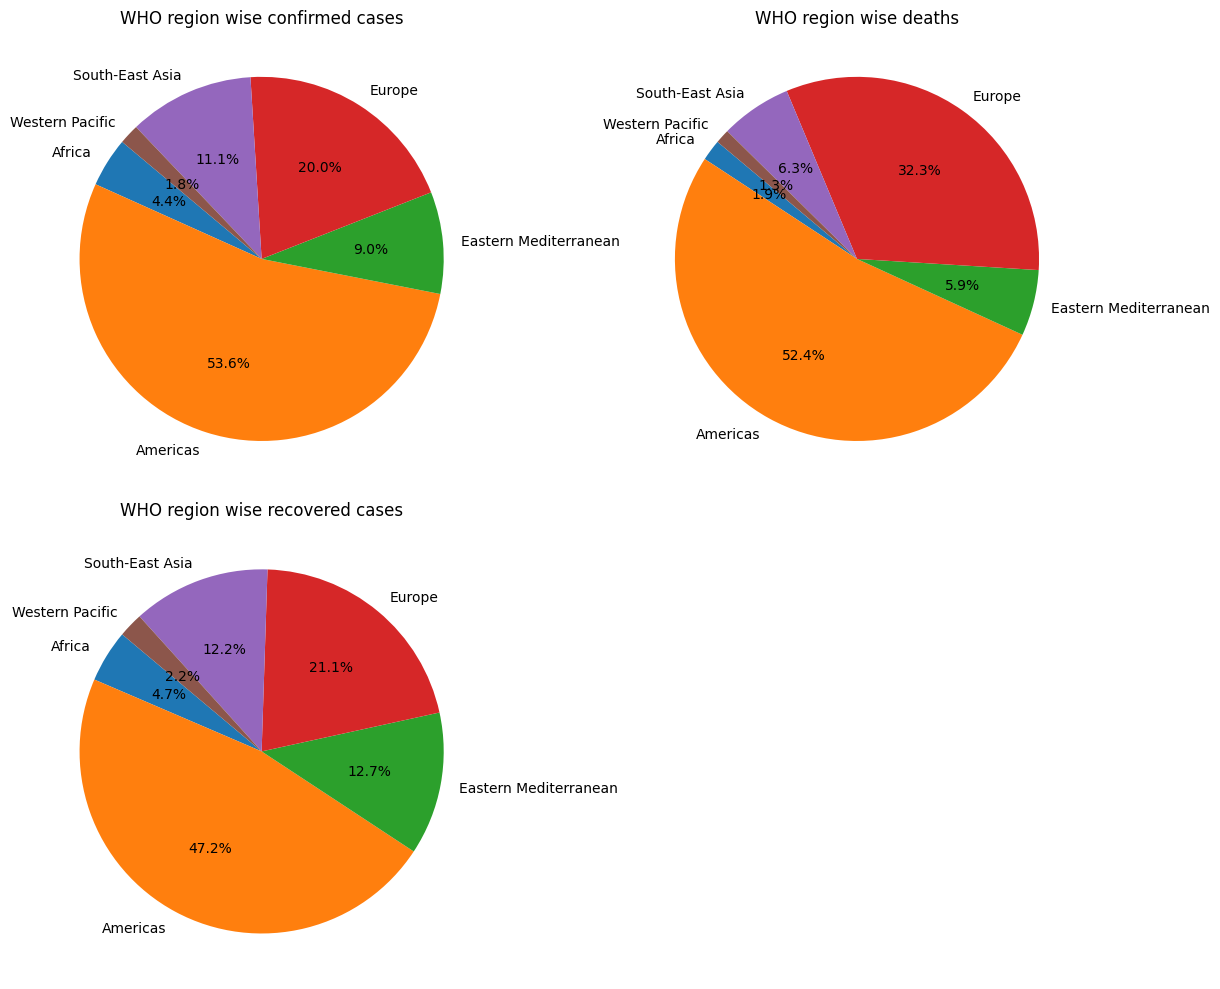

In [49]:
df_who=df1.groupby("WHO Region").sum(numeric_only=True)
print(df_who.to_string())
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
plt.pie(df_who["Confirmed"], labels=df_who.index, autopct="%1.1f%%", startangle=140)
plt.title("WHO region wise confirmed cases")

plt.subplot(2,2,2)
plt.pie(df_who["Deaths"], labels=df_who.index, autopct="%1.1f%%", startangle=140)
plt.title("WHO region wise deaths")

plt.subplot(2,2,3)
plt.pie(df_who["Recovered"], labels=df_who.index, autopct="%1.1f%%", startangle=140)
plt.title("WHO region wise recovered cases")

plt.tight_layout()
plt.show()
